In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append("/./palin")

from palin.kernels import classification_images

In [28]:
# List to hold individual dataframes
input_folder = "/home/paige/Documents/vocal_ambiguity/interspeech/revcor_avc/data/japanese_l1/word"
dataframes = []
# Iterate through all files in the folder
for filename in os.listdir(input_folder):
    if filename.endswith(".csv"):
        file_path = os.path.join(input_folder, filename)
        print(f"Reading {file_path}...")
        
        # Read each CSV file and append to the list of dataframes
        df = pd.read_csv(file_path)
        dataframes.append(df)

# Concatenate all dataframes into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined dataframe to a new CSV file
combined_df.to_csv("/home/paige/Documents/vocal_ambiguity/interspeech/revcor_avc/data/japanese_l1/word/combined_word_japanese", index=False)


Reading /home/paige/Documents/vocal_ambiguity/interspeech/revcor_avc/data/japanese_l1/word/YAY.csv...


ParserError: Error tokenizing data. C error: Expected 12 fields in line 457, saw 13


In [5]:
DIRECTORY_PHRASES = "/home/paige/Documents/vocal_ambiguity/interspeech/revcor_avc/data/japanese_l1/phrase/combined_phrase_japanese.csv"
DIRECTORY_WORD = "/home/paige/Documents/vocal_ambiguity/interspeech/revcor_avc/data/mandarin_l1/word/english/tidy_mandarin_word.csv"
L1 = "Mandarin L1"

## Phrases

In [4]:
phrase_responses = pd.read_csv(DIRECTORY_PHRASES)

Check response balance

In [5]:
phrase_single_response = phrase_responses.drop_duplicates( 
  subset = ['subj', 'stim'], 
  keep = 'last').reset_index(drop = True)
phrase_single_response['response'].value_counts()

response
0    1995
1    1255
Name: count, dtype: int64

In [7]:
# analysis for pitch
trial_ids=['subj']
kernels_pitch_phrase_diff=classification_images.compute_kernel_diff(phrase_responses,trial_ids,'segment_time','response','pitch')
kernels_pitch_phrase_pill, kernels_pitch_phrase_peel =classification_images.compute_kernel(phrase_responses,trial_ids,'segment_time','response','pitch')

Text(0, 0.5, 'Normalized Pitch Kernel (a.u.)')

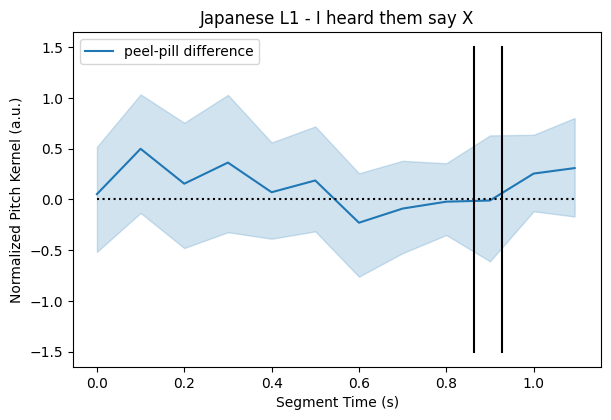

In [8]:
fig = plt.figure(figsize=(15,10))
plt.style.use('default')
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)


plt.style.use('default')
ax = fig.add_subplot(2,2,1)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_pitch_phrase_diff,
                  errorbar=('ci', 95),
                  label="peel-pill difference",
                  ax=ax)
plt.plot([0,1.1],[0,0],color='k',linestyle = ':')
plt.plot([0.864,0.864],[-1.5,1.5],color='k',linestyle = '-')
plt.plot([0.927,0.927],[-1.5,1.5],color='k',linestyle = '-')
plt.title(f"{L1} - I heard them say X")
plt.xlabel("Segment Time (s)")
plt.ylabel("Normalized Pitch Kernel (a.u.)")

Text(0, 0.5, 'Normalized Pitch Kernel (a.u.)')

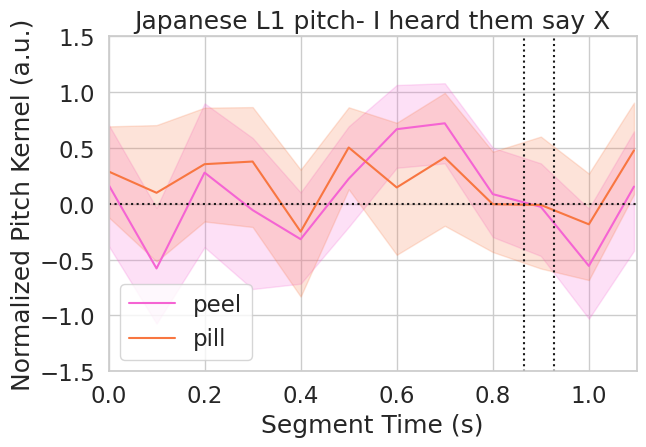

In [10]:
fig = plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
sns.set(font_scale=1.5)
sns.set_palette("husl", 3)
sns.set_palette(sns.husl_palette(h=0.9))
sns.set_style("whitegrid")

ax = fig.add_subplot(2,2,1)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_pitch_phrase_peel,
                  errorbar=('ci', 95),
                  label="peel",
                  ax=ax)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_pitch_phrase_pill,
                  errorbar=('ci', 95),
                  label="pill",
                  ax=ax)
plt.plot([0,1.1],[0,0],color='k',linestyle = ':')
plt.plot([0.864,0.864],[-2,2],color='k',linestyle = ':')
plt.plot([0.927,0.927],[-2,2],color='k',linestyle = ':')
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(0, 1.1)
plt.legend(loc='lower left')
plt.title(f"{L1} pitch- I heard them say X")
plt.xlabel("Segment Time (s)")
plt.ylabel("Normalized Pitch Kernel (a.u.)")

Text(0, 0.5, 'Normalized Pitch Kernel (a.u.)')

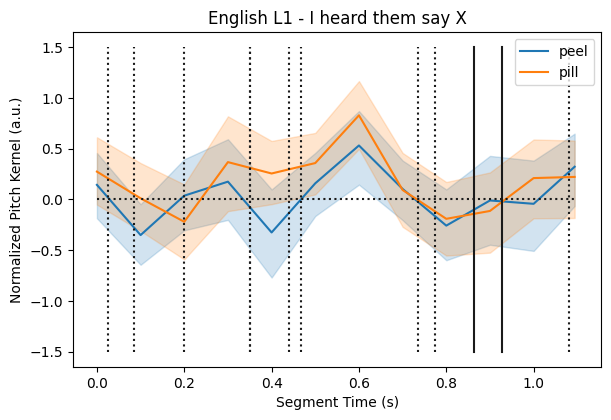

In [31]:
fig = plt.figure(figsize=(15,10))
plt.style.use('default')
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)

plt.style.use('default')
ax = fig.add_subplot(2,2,1)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_pitch_phrase_peel,
                  errorbar=('ci', 95),
                  label="peel",
                  ax=ax)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_pitch_phrase_pill,
                  errorbar=('ci', 95),
                  label="pill",
                  ax=ax)
plt.plot([0,1.1],[0,0],color='k',linestyle = ':')
plt.plot([0.864,0.864],[-1.5,1.5],color='k',linestyle = '-')
plt.plot([0.927,0.927],[-1.5,1.5],color='k',linestyle = '-')
plt.plot([0.026,0.026],[-1.5,1.5],color='k',linestyle = ':')
plt.plot([0.085, 0.085],[-1.5,1.5],color='k',linestyle = ':')
plt.plot([0.2, 0.2],[-1.5,1.5],color='k',linestyle = ':')
plt.plot([0.350, 0.350],[-1.5,1.5],color='k',linestyle = ':')
plt.plot([0.350, 0.350],[-1.5,1.5],color='k',linestyle = ':')
plt.plot([0.44, 0.44],[-1.5,1.5],color='k',linestyle = ':')
plt.plot([0.468, 0.468],[-1.5,1.5],color='k',linestyle = ':')
plt.plot([0.735, 0.735],[-1.5,1.5],color='k',linestyle = ':')
plt.plot([0.775, 0.775],[-1.5,1.5],color='k',linestyle = ':')
plt.plot([1.08, 1.08],[-1.5,1.5],color='k',linestyle = ':')
plt.title(f"{L1} - I heard them say X")
plt.xlabel("Segment Time (s)")
plt.ylabel("Normalized Pitch Kernel (a.u.)")

In [11]:
phrase_paired_pitch = classification_images.paired_sample(kernels_pitch_phrase_peel, kernels_pitch_phrase_pill,'segment_time','norm_value')
phrase_paired_pitch

{np.float64(0.0): TtestResult(statistic=np.float64(-0.2901501961753985), pvalue=np.float64(0.7766542608926481), df=np.int64(12)),
 np.float64(0.1): TtestResult(statistic=np.float64(-1.395690066352301), pvalue=np.float64(0.1880963339500356), df=np.int64(12)),
 np.float64(0.2): TtestResult(statistic=np.float64(-0.14466284393150194), pvalue=np.float64(0.8873783267926197), df=np.int64(12)),
 np.float64(0.3): TtestResult(statistic=np.float64(-0.773840873434541), pvalue=np.float64(0.45400077307509945), df=np.int64(12)),
 np.float64(0.4): TtestResult(statistic=np.float64(-0.1961066079019774), pvalue=np.float64(0.8478084745841553), df=np.int64(12)),
 np.float64(0.5): TtestResult(statistic=np.float64(-0.7113281620380767), pvalue=np.float64(0.49047766705867724), df=np.int64(12)),
 np.float64(0.6): TtestResult(statistic=np.float64(1.2365296858456554), pvalue=np.float64(0.23991693412172838), df=np.int64(12)),
 np.float64(0.7): TtestResult(statistic=np.float64(0.9417303972471421), pvalue=np.float64

In [12]:
# analysis for stretch
trial_ids=['subj']
kernels_stretch_phrase_diff=classification_images.compute_kernel_diff(phrase_responses,trial_ids,'segment_time','response','stretch')
kernels_stretch_phrase_peel, kernels_stretch_phrase_pill=classification_images.compute_kernel(phrase_responses,trial_ids,'segment_time','response','stretch')

Text(0, 0.5, 'Normalized Stretch Kernel (a.u.)')

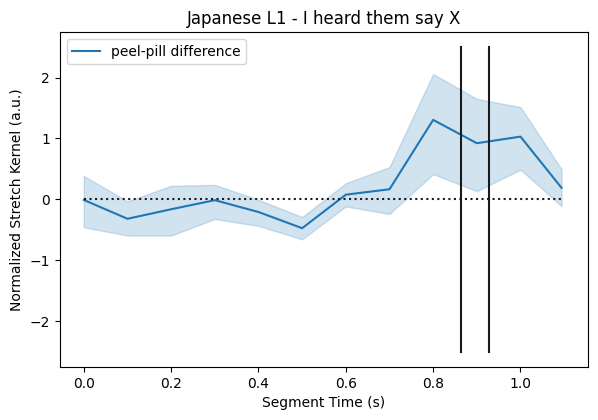

In [13]:
fig = plt.figure(figsize=(15,10))
plt.style.use('default')
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)


plt.style.use('default')
ax = fig.add_subplot(2,2,1)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_stretch_phrase_diff,
                  errorbar=('ci', 95),
                  label="peel-pill difference",
                  ax=ax)
plt.plot([0,1.1],[0,0],color='k',linestyle = ':')
plt.plot([0.864,0.864],[-2.5,2.5],color='k',linestyle = '-')
plt.plot([0.927,0.927],[-2.5,2.5],color='k',linestyle = '-')
plt.title(f"{L1} - I heard them say X")
plt.xlabel("Segment Time (s)")
plt.ylabel("Normalized Stretch Kernel (a.u.)")

Text(0, 0.5, 'Normalized Stretch Kernel (a.u.)')

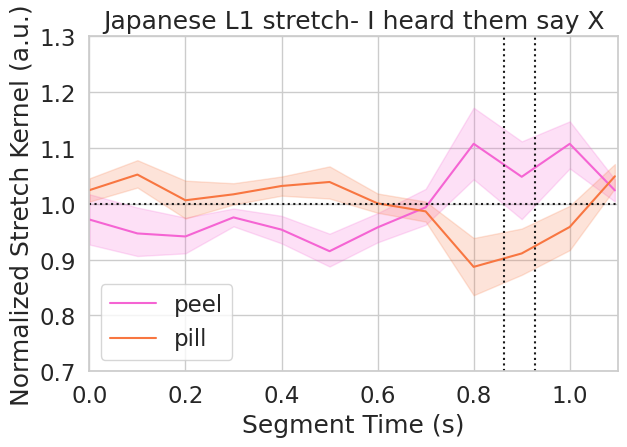

In [14]:
fig = plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
sns.set(font_scale=1.5)
sns.set_palette(sns.husl_palette(h=0.9))
sns.set_style("whitegrid")

ax = fig.add_subplot(2,2,1)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_stretch_phrase_peel,
                  errorbar=('ci', 95),
                  label="peel",
                  ax=ax)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_stretch_phrase_pill,
                  errorbar=('ci', 95),
                  label="pill",
                  ax=ax)
plt.plot([0,1.1],[1,1],color='k',linestyle = ':')
plt.plot([0.864,0.864],[0.7,1.3],color='k',linestyle = ':')
plt.plot([0.927,0.927],[0.7,1.3],color='k',linestyle = ':')
ax.set_ylim(0.7, 1.3)
ax.set_xlim(0, 1.1)
plt.legend(loc='lower left')
plt.title(f"{L1} stretch- I heard them say X")
plt.xlabel("Segment Time (s)")
plt.ylabel("Normalized Stretch Kernel (a.u.)")

Text(0, 0.5, 'Normalized Stretch Kernel (a.u.)')

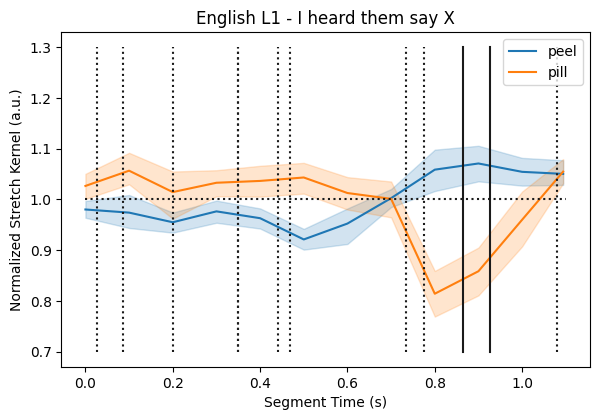

In [38]:
fig = plt.figure(figsize=(15,10))
plt.style.use('default')
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)

plt.style.use('default')
ax = fig.add_subplot(2,2,1)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_stretch_phrase_peel,
                  errorbar=('ci', 95),
                  label="peel",
                  ax=ax)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_stretch_phrase_pill,
                  errorbar=('ci', 95),
                  label="pill",
                  ax=ax)
plt.plot([0,1.1],[1,1],color='k',linestyle = ':')
plt.plot([0.864,0.864],[0.7,1.3],color='k',linestyle = '-')
plt.plot([0.927,0.927],[0.7,1.3],color='k',linestyle = '-')
plt.plot([0.026,0.026],[0.7,1.3],color='k',linestyle = ':')
plt.plot([0.085, 0.085],[0.7,1.3],color='k',linestyle = ':')
plt.plot([0.2, 0.2],[0.7,1.3],color='k',linestyle = ':')
plt.plot([0.350, 0.350],[0.7,1.3],color='k',linestyle = ':')
plt.plot([0.350, 0.350],[0.7,1.3],color='k',linestyle = ':')
plt.plot([0.44, 0.44],[0.7,1.3],color='k',linestyle = ':')
plt.plot([0.468, 0.468],[0.7,1.3],color='k',linestyle = ':')
plt.plot([0.735, 0.735],[0.7,1.3],color='k',linestyle = ':')
plt.plot([0.775, 0.775],[0.7,1.3],color='k',linestyle = ':')
plt.plot([1.08, 1.08],[0.7,1.3],color='k',linestyle = ':')
plt.title(f"{L1} - I heard them say X")
plt.xlabel("Segment Time (s)")
plt.ylabel("Normalized Stretch Kernel (a.u.)")

In [15]:
phrase_paired_stretch = classification_images.paired_sample(kernels_stretch_phrase_peel, kernels_stretch_phrase_pill,'segment_time','norm_value')
phrase_paired_stretch

{np.float64(0.0): TtestResult(statistic=np.float64(-1.5993182308742868), pvalue=np.float64(0.13573217118926698), df=np.int64(12)),
 np.float64(0.1): TtestResult(statistic=np.float64(-3.1022262189634944), pvalue=np.float64(0.009152065629896377), df=np.int64(12)),
 np.float64(0.2): TtestResult(statistic=np.float64(-2.1439320412410927), pvalue=np.float64(0.05321648411509113), df=np.int64(12)),
 np.float64(0.3): TtestResult(statistic=np.float64(-2.6925968219892096), pvalue=np.float64(0.019575605268483735), df=np.int64(12)),
 np.float64(0.4): TtestResult(statistic=np.float64(-4.587895977178261), pvalue=np.float64(0.0006238511244308439), df=np.int64(12)),
 np.float64(0.5): TtestResult(statistic=np.float64(-6.05097066179575), pvalue=np.float64(5.750083433629422e-05), df=np.int64(12)),
 np.float64(0.6): TtestResult(statistic=np.float64(-2.131058136420501), pvalue=np.float64(0.0544521243246603), df=np.int64(12)),
 np.float64(0.7): TtestResult(statistic=np.float64(0.3849133300346957), pvalue=np.

## WORD

In [6]:
# 2nd analysis, words
word_responses  = pd.read_csv(DIRECTORY_WORD)

In [7]:
word_single_response = word_responses.drop_duplicates( 
  subset = ['subj', 'stim'], 
  keep = 'last').reset_index(drop = True)
word_single_response['response'].value_counts()

response
1    3458
0    3042
Name: count, dtype: int64

In [9]:
# analysis for pitch
trial_ids=['subj']
kernels_pitch_word_diff=classification_images.compute_kernel_diff(word_responses,trial_ids,'segment_time','response','pitch')
kernels_pitch_word_peel, kernels_pitch_word_pill=classification_images.compute_kernel(word_responses,trial_ids,'segment_time','response','pitch')

In [10]:
kernels_pitch_word_diff = kernels_pitch_word_diff.round(5)
kernels_pitch_word_diff = kernels_pitch_word_diff.drop_duplicates( 
  subset = ['subj', 'segment_time'], 
  keep = 'first').reset_index(drop = True)
kernels_pitch_word_peel = kernels_pitch_word_peel.round(5)
kernels_pitch_word_peel = kernels_pitch_word_peel.drop_duplicates( 
  subset = ['subj', 'segment_time'], 
  keep = 'first').reset_index(drop = True)
kernels_pitch_word_pill = kernels_pitch_word_pill.round(5)
kernels_pitch_word_pill = kernels_pitch_word_pill.drop_duplicates( 
  subset = ['subj', 'segment_time'], 
  keep = 'first').reset_index(drop = True)

Text(0, 0.5, 'Normalized Pitch Kernel (a.u.)')

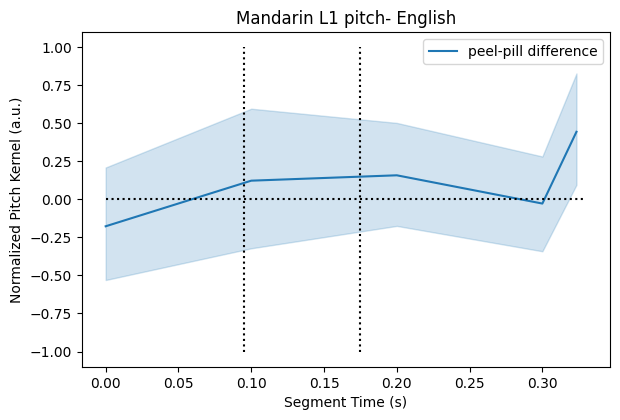

In [11]:
fig = plt.figure(figsize=(15,10))
plt.style.use('default')
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)


plt.style.use('default')
ax = fig.add_subplot(2,2,1)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_pitch_word_diff,
                  errorbar=('ci', 95),
                  label="peel-pill difference",
                  ax=ax)
plt.plot([0,0.33],[0,0],color='k',linestyle = ':')
plt.plot([0.095,0.095],[-1,1],color='k',linestyle = ':')
plt.plot([0.175,0.175],[-1,1],color='k',linestyle = ':')
plt.title(f"{L1} pitch- English")
plt.xlabel("Segment Time (s)")
plt.ylabel("Normalized Pitch Kernel (a.u.)")

Text(0, 0.5, 'Normalized Pitch Kernel (a.u.)')

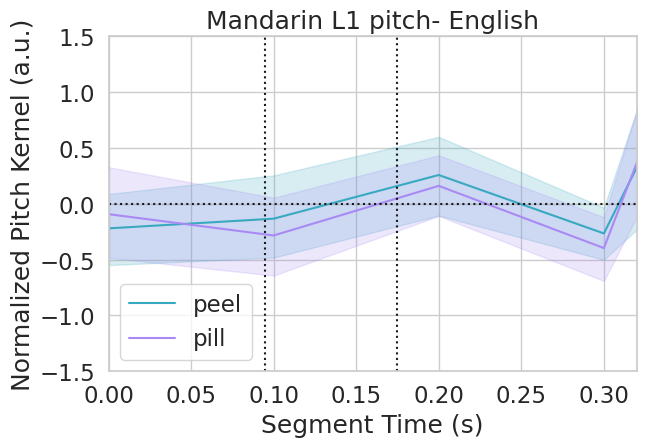

In [27]:
fig = plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
sns.set(font_scale=1.5)
sns.set_palette(sns.husl_palette(h=0.6))
sns.set_style("whitegrid")

ax = fig.add_subplot(2,2,1)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_pitch_word_peel,
                  errorbar=('ci', 95),
                  label="peel",
                  ax=ax)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_pitch_word_pill,
                  errorbar=('ci', 95),
                  label="pill",
                  ax=ax)
plt.plot([0,0.33],[0,0],color='k',linestyle = ':')
plt.plot([0.095,0.095],[-1.5,1.5],color='k',linestyle = ':')
plt.plot([0.175,0.175],[-1.5,1.5],color='k',linestyle = ':')
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(0, 0.32)
plt.legend(loc='lower left')
plt.title(f"{L1} pitch- English")
plt.xlabel("Segment Time (s)")
plt.ylabel("Normalized Pitch Kernel (a.u.)")

In [14]:
word_paired_pitch = classification_images.paired_sample(kernels_pitch_word_peel, kernels_pitch_word_pill,'segment_time','norm_value')
word_paired_pitch

{np.float64(0.0): TtestResult(statistic=np.float64(-0.42952627085604084), pvalue=np.float64(0.6712196127592267), df=np.int64(25)),
 np.float64(0.1): TtestResult(statistic=np.float64(0.5057610551482955), pvalue=np.float64(0.6174549985393113), df=np.int64(25)),
 np.float64(0.2): TtestResult(statistic=np.float64(0.39826133554171605), pvalue=np.float64(0.6938184411238788), df=np.int64(25)),
 np.float64(0.3): TtestResult(statistic=np.float64(0.6520681501755072), pvalue=np.float64(0.5203078556323153), df=np.int64(25)),
 np.float64(0.32342): TtestResult(statistic=np.float64(-0.19415884747026727), pvalue=np.float64(0.8476205696400266), df=np.int64(25))}

In [15]:
# analysis for stretch
trial_ids=['subj']
kernels_stretch_word_diff=classification_images.compute_kernel_diff(word_responses,trial_ids,'segment_time','response','stretch')
kernels_stretch_word_peel, kernels_stretch_word_pill=classification_images.compute_kernel(word_responses,trial_ids,'segment_time','response','stretch')

In [16]:
kernels_stretch_word_diff = kernels_stretch_word_diff.round(5)
kernels_stretch_word_diff = kernels_stretch_word_diff.drop_duplicates( 
  subset = ['subj', 'segment_time'], 
  keep = 'first').reset_index(drop = True)
kernels_stretch_word_peel = kernels_stretch_word_peel.round(5)
kernels_stretch_word_peel = kernels_stretch_word_peel.drop_duplicates( 
  subset = ['subj', 'segment_time'], 
  keep = 'first').reset_index(drop = True)
kernels_stretch_word_pill = kernels_stretch_word_pill.round(5)
kernels_stretch_word_pill = kernels_stretch_word_pill.drop_duplicates( 
  subset = ['subj', 'segment_time'], 
  keep = 'first').reset_index(drop = True)

Text(0, 0.5, 'Normalized Stretch Kernel (a.u.)')

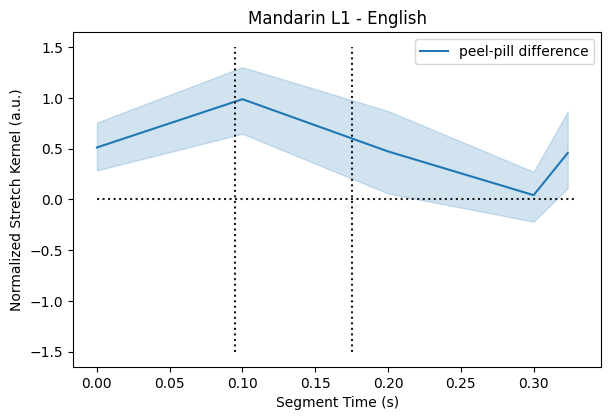

In [17]:
fig = plt.figure(figsize=(15,10))
plt.style.use('default')
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)


plt.style.use('default')
ax = fig.add_subplot(2,2,1)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_stretch_word_diff,
                  errorbar=('ci', 95),
                  label="peel-pill difference",
                  ax=ax)
plt.plot([0,0.33],[0,0],color='k',linestyle = ':')
plt.plot([0.095,0.095],[-1.5,1.5],color='k',linestyle = ':')
plt.plot([0.175,0.175],[-1.5,1.5],color='k',linestyle = ':')
plt.title(f"{L1} - English")
plt.xlabel("Segment Time (s)")
plt.ylabel("Normalized Stretch Kernel (a.u.)")

Text(0, 0.5, 'Normalized Stretch Kernel (a.u.)')

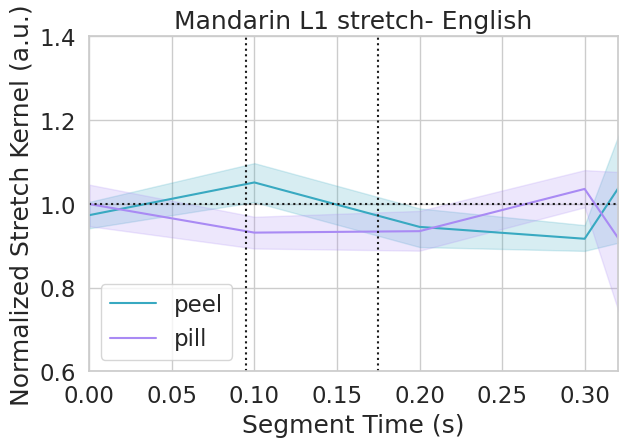

In [26]:
fig = plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
sns.set(font_scale=1.5)
sns.set_palette(sns.husl_palette(h=0.6))
sns.set_style("whitegrid")

ax = fig.add_subplot(2,2,1)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_stretch_word_peel,
                  errorbar=('ci', 95),
                  label="peel",
                  ax=ax)
ax = sns.lineplot(x="segment_time",
                  y="norm_value",
                  data=kernels_stretch_word_pill,
                  errorbar=('ci', 95),
                  label="pill",
                  ax=ax)
plt.plot([0,0.33],[1,1],color='k',linestyle = ':')
plt.plot([0.095,0.095],[0.6,1.4],color='k',linestyle = ':')
plt.plot([0.175,0.175],[0.6,1.4],color='k',linestyle = ':')
ax.set_ylim(0.6, 1.4)
ax.set_xlim(0, 0.32)
plt.legend(loc='lower left')
plt.title(f"{L1} stretch- English")
plt.xlabel("Segment Time (s)")
plt.ylabel("Normalized Stretch Kernel (a.u.)")

In [19]:
word_paired_stretch = classification_images.paired_sample(kernels_stretch_word_peel, kernels_stretch_word_pill,'segment_time','norm_value')
word_paired_stretch

{np.float64(0.0): TtestResult(statistic=np.float64(-0.7547570962921958), pvalue=np.float64(0.45744636718285847), df=np.int64(25)),
 np.float64(0.1): TtestResult(statistic=np.float64(3.5833231050655243), pvalue=np.float64(0.0014317780733917622), df=np.int64(25)),
 np.float64(0.2): TtestResult(statistic=np.float64(0.25489564118267305), pvalue=np.float64(0.8008888876146998), df=np.int64(25)),
 np.float64(0.3): TtestResult(statistic=np.float64(-3.97434902202687), pvalue=np.float64(0.0005291670328412674), df=np.int64(25)),
 np.float64(0.32342): TtestResult(statistic=np.float64(1.2982604117443741), pvalue=np.float64(0.20604749612513157), df=np.int64(25))}